<a href="https://colab.research.google.com/github/DavidMercadoFaustino/Analise_financeira/blob/main/Analise_de_A%C3%A7%C3%B5es.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Análise de ações com Python** 

In [1]:
### Instalação dos Pacotes
!pip install --upgrade pandas-datareader #<- Caso o Pandas Data Reader não seja na versão 0.10.0
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import datetime as dt


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [11]:
#Análise exploratória da ação do Apple
symbol = 'AAPL' # Escolhe a ação a ser analisada
df = pdr.DataReader(symbol, 'yahoo', '2020-07-01', '2022-07-31') # Baixar os preços do periódo
df.describe()

,High,Low,Open,Close,Volume,Adj Close
count,524.000000,524.000000,524.000000,524.000000,5.240000e+02,524.000000
mean,140.974079,137.588654,139.274032,139.350158,1.036822e+08,138.452387
std,20.857345,20.473588,20.630788,20.695000,4.430599e+07,20.960470
min,91.839996,89.144997,90.987503,91.027496,4.100000e+07,89.779892
25%,125.379999,122.317497,124.065001,124.377499,7.516075e+07,123.060431
50%,140.729996,136.635002,137.844994,138.599998,9.149395e+07,137.863266
75%,154.785000,150.847504,152.580002,152.665005,1.175325e+08,151.953491
max,182.940002,179.119995,182.630005,182.009995,3.743368e+08,181.259933


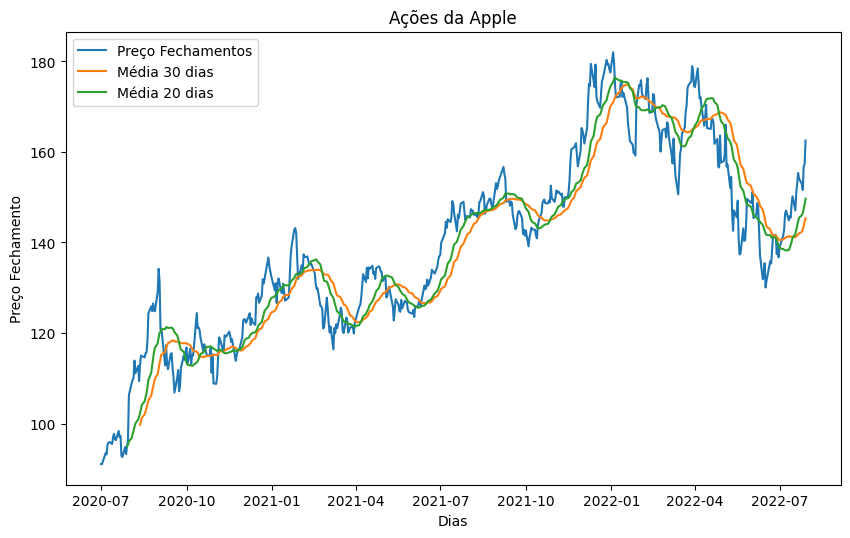

In [8]:
# Comparação entre o preço do fechamento e média de 30, 20 e 10 dias
x=df['Close']
media30=x.rolling(30).mean() # preço médio dos 30 dias
media20=x.rolling(20).mean() # preço médio dos 20 dias
media10=x.rolling(10).mean() # preço médio dos 10 dias

# Plotar o preço das ações da Apple 
plt.figure(figsize=(10,6), dpi=100)
plt.title("Ações da Apple")
plt.xlabel('Dias')
plt.ylabel('Preço Fechamento')
plt.plot(x, label='Preço Fechamentos')
plt.plot(media30, label='Média 30 dias')
plt.plot(media20, label='Média 20 dias')
#plt.plot(media10, label='Média 10 dias')
plt.legend()
plt.show()

In [14]:
#Analise Bollinger Bands

def med_mov(preco, dias): # cria a função da média movél
    return preco.rolling(dias).mean()

def bollinger_bands(preco, dias): # cria a analise bollinger bands
    med = med_mov(preco, dias)
    dev = preco.rolling(dias).std() # Calclular o desvio padrão da média movel
    bollinger_up = med + dev * 2 # Desvio superior
    bollinger_down = med - dev * 2 # Desvop inferior
    return bollinger_up, bollinger_down



In [15]:
#obtendo as analise bollinger bands
symbol = 'AAPL' # Escolhe a ação a ser analisada
df = pdr.DataReader(symbol, 'yahoo', '2020-07-01', '2022-07-31') # Baixar os preços do periódo
preco = df['Close']
dias= 20
bollinger_up, bollinger_down = bollinger_bands(preco,dias)

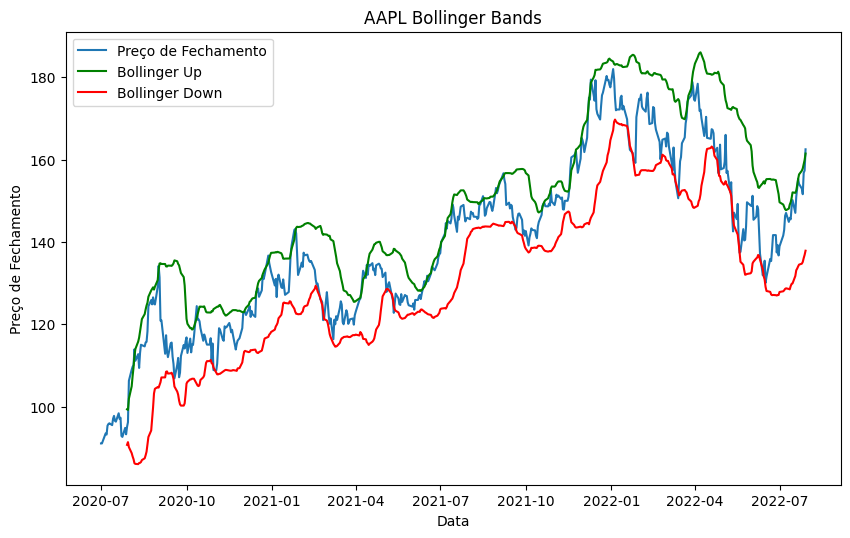

In [16]:
# Plotar a variação do preço com a faixa de variação bollinger
plt.figure(figsize=(10,6), dpi=100)
plt.title(symbol + ' Bollinger Bands')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento')
plt.plot(preco, label='Preço de Fechamento')
plt.plot(bollinger_up, label='Bollinger Up', c='g')
plt.plot(bollinger_down, label='Bollinger Down', c='r')
plt.legend()
plt.show()

In [21]:
#Analise Relative Stregth Index
def rsi(preco, dias):#criar a função de Analise RSI
    preco_dif = preco.diff()
    # Criar uma serie de dos dias com  ganhos e dias de perda
    posit = preco_dif.clip(lower=0)
    negat = -1 * preco_dif.clip(upper=0)
    # Média dos dias de ganho e perda
    ma_up = posit.ewm(com = dias - 1, adjust=True, min_periods = dias).mean()
    ma_down = negat.ewm(com = dias - 1, adjust=True, min_periods = dias).mean()
    #Cria o indice do RSI
    rsi = ma_up / ma_down
    rsi = 100 - (100/(1 + rsi))
    return rsi

In [25]:
RSI = rsi(preco,dias)


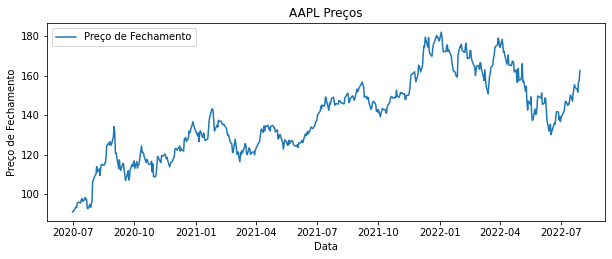

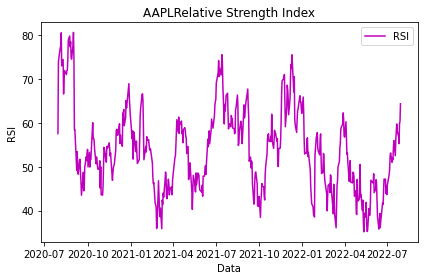

In [31]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(2, 1, 1)
plt.title(symbol + ' Preços')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento')
plt.plot(preco, label='Preço de Fechamento')
plt.legend()
plt.show()
bx = fig.add_subplot(2, 1, 2)
plt.title(symbol +'Relative Strength Index')
plt.xlabel('Data')
plt.ylabel('RSI')
plt.plot(RSI, 'm', label='RSI')
plt.legend()
plt.tight_layout()
plt.show()